In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', 99)
pd.set_option('max_rows', 20)


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('./1_Music Cities Together COVID-19 IMPACT SURVEY.csv')

df.head()

,Timestamp,In what state do you reside?,In what city do you reside?,What is your zip code?,What is your gender identification?,How do you define your race and ethnicity,Do you currently have health insurance?,Who provides your health insurance?,Do you currently have dependents?,How many dependents count on you for economic support?,"Which definition best fits your employment status as a music and entertainment professional? (Tip: If you are in a band, your status is likely as a business co-owner, unless a more formal agreement is in place.)",Music and entertainment people often work several different jobs related to music/entertainment. The following are 11 major occupational groupings. Which one best describes your PRIMARY OCCUPATION in music and entertainment? (Approximate as best you can. Please pick only one.),How has your PRIMARY OCCUPATION work in music and entertainment been most impacted by COVID-19?,Please estimate 2020 lost income from music-related work to COVID-19 by quarters (for your primary music/entertainment occupation). [Quarter 1 (Jan - Mar)],Please estimate 2020 lost income from music-related work to COVID-19 by quarters (for your primary music/entertainment occupation). [Quarter 2 (Apr - Jun)],Please estimate 2020 lost income from music-related work to COVID-19 by quarters (for your primary music/entertainment occupation). [Quarter 3 (Jul - Sept)],Please estimate 2020 lost income from music-related work to COVID-19 by quarters (for your primary music/entertainment occupation). [Quarter 4 (Oct - Dec)],Please provide the total percentage this estimated loss represents relative to your total 2019 earnings as a music industry professional (for your primary music/entertainment occupation).,"Do you supplement your income as a music or entertainment professional with an additional job in or around the music/entertainment industry, which we'll refer to as your SECONDARY OCCUPATION in music/entertainment? If so, what definition best fits your employment status for your secondary occupation in music/entertainment?",How has your secondary work been most impacted by COVID-19 (for your secondary music/entertainment occupation)?,Please estimate 2020 lost income from music-related work to COVID-19 by quarters (for secondary music/entertainment occupation). [Quarter 1 (Jan - Mar)],Please estimate 2020 lost income from music-related work to COVID-19 by quarters (for secondary music/entertainment occupation). [Quarter 2 (Apr - Jun)],Please estimate 2020 lost income from music-related work to COVID-19 by quarters (for secondary music/entertainment occupation). [Quarter 3 (Jul - Sept)],Please estimate 2020 lost income from music-related work to COVID-19 by quarters (for secondary music/entertainment occupation). [Quarter 4 (Oct - Dec)],Please provide the total percentage this estimated loss represents relative to your total 2019 earnings as a music industry professional (for secondary music/entertainment occupation).,How helpful to sustaining your work during this coronavirus pandemic is Paid Sick Leave?,Paid family leave to care for loved ones who are sick or who belong to an at-risk population?,Unemployment Benefits?,No Interest Business Loans?,Deferred Tax Payments?,Food and Housing Assistance?,Rent/Mortgage Suspension?,Utility Bill Suspension?,How confident are you that you will receive funding from the government or charities to make up for lost income?,"Do you intend to apply for assistance funds in the next several months? If so, what kind of support do you anticipate pursuing? Check all that apply.",What are the biggest barriers to accessing recovery funds? Check all that apply.,Any other thoughts or feedback you wish to share?,Thank you for taking the time to share your thoughts. Music Cities Together is actively working on advocacy related to this crisis. Please provide your email below if you'd like to receive updates on this survey and related resources.
0,2020/04/01 6:14:47 PM EST,TX : Texas,austin,78652,Male,Whi

## Data Cleaning

In [3]:
# Renaming all the columns

df.columns = ['timestamp', 'state', 'city', 'zipcode', 'gender', 'ethnicity', 'have_insurance', 
              'insurance_provider', 'have_dependents', 'num_dependents', 'music_employment_definition',
              'primary_music_occupation', 'primary_impact_type', 'primary_income_loss_q1', 
              'primary_income_loss_q2', 'primary_income_loss_q3', 'primary_income_loss_q4', 
              'primary_perc_loss_rel2019', 
              'secondary_occupation_definition', 'secondary_impact_type', 'secondary_income_loss_q1', 
              'secondary_income_loss_q2', 'secondary_income_loss_q3', 'secondary_income_loss_q4', 
              'secondary_perc_loss_rel2019', 'paid_sick_leave_helpful', 'paid_family_leave_helpful', 
              'unemployment_helpful', 'zero_interest_loans_helpful', 'deferred_tax_payments_helpful', 
              'food_housing_assist_helpful', 'rent_mortgage_susp_helpful', 
              'utility_susp_helpful', 'gov_char_funds_confidence', 'assist_funds_intention', 'barriers_to_funds', 
              'feedback', 'email']

# converting timestamp to proper type

df['timestamp'] = pd.to_datetime(df['timestamp'])

# Removing all of the responses that do not pertain to a music professional

df = df[df['music_employment_definition'] != 'I am not a music or entertainment professional at all.']


/opt/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [4]:
df['state'].value_counts()

TX : Texas             268
NC : North Carolina    106
LA : Louisiana          36
IL : Illinois           14
SC : South Carolina      5
OH : Ohio                3
MD : Maryland            2
PA : Pennsylvania        2
CO : Colorado            2
WA : Washington          2
Washington DC            2
TN : Tennessee           2
NY : New York            1
CA : California          1
IA : Iowa                1
VA : Virginia            1
Name: state, dtype: int64

In [5]:
def e_d_a_(df):
    """
    This function is my favorite means to quickly display 
    key features of my data and what may need to be cleaned.
    """
    eda = pd.DataFrame({'null_sum': df.isnull().sum(),
                        'null_percent': df.isnull().mean(),
                        'dtypes': df.dtypes,
                        'count': df.count(),
                        'mean': df.mean(),
                        'median': df.median(),
                        'min': df.min(),
                        'max': df.max()})
    print(df.shape)
    return eda

In [6]:
e_d_a_(df)

(448, 38)


,null_sum,null_percent,dtypes,count,mean,median,min,max
assist_funds_intention,4,0.008929,object,444,NaN,NaN,NaN,NaN
barriers_to_funds,2,0.004464,object,446,NaN,NaN,NaN,NaN
city,0,0.000000,object,448,NaN,NaN,Arlington,skokie
deferred_tax_payments_helpful,0,0.000000,float64,448,2.330357,2.0,1,5
email,277,0.618304,object,171,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
timestamp,0,0.000000,datetime64[ns],448,NaN,NaN,2020-04-01 18:14:47,2020-05-05 21:02:07
unemployment_helpful,0,0.000000,float64,448,1.926339,1.0,1,5
utility_susp_helpful,0,0.000000,float64,448,2.136161,2.0,1,5
zero_interest_loans_helpful,0,0.000000,float64,448,2.665179,3.0,1,5


### Null Values

In [7]:
cols_w_null = df.columns[df.isnull().sum()>0]
df[cols_w_null].head()

,insurance_provider,num_dependents,primary_music_occupation,primary_income_loss_q1,primary_income_loss_q2,primary_income_loss_q3,primary_income_loss_q4,primary_perc_loss_rel2019,secondary_impact_type,secondary_income_loss_q1,secondary_income_loss_q2,secondary_income_loss_q3,secondary_income_loss_q4,secondary_perc_loss_rel2019,assist_funds_intention,barriers_to_funds,feedback,email
0,"Family member, or their employer provides",1 dependent (other than self),"Music Development (Education, training, confer...",$2500 or less;$2501-$5000,"$5001-$10,000","$5001-$10,000","$5001-$10,000",26-50%,"So far, my work has not been impacted",NaN,NaN,NaN,NaN,NaN,Funding from city/state government;Assistance ...,Lack of information on how to apply,NaN,NaN
1,NaN,NaN,"Presenters / Venues (owners, managers and sala...","$5001-$10,000","$5001-$10,000","$5001-$10,000",$2501-$5000,26-50%,I have contracts/projects/gigs postponed.,"$5001-$10,000",$2501-$5000,$2500 or less,$2500 or less,25% or less of my music income,Federal funding;Funding from city/state govern...,Not enough funds to go around,Digital earnings are highly competitive even a...,parlorcolumbus@gmail.com
2,"Family member, or their employer provides",3 dependents (other than self),"Music Creatives (live or studio musician, voca...","$5001-$10,000","$5001-$10,000","$5001-$10,000","$5001-$10,000",51-75%,I have contracts/projects/gigs postponed.,$2500 or less,$2500 or less,$2500 or less,$2500 or less,26-50%,Federal funding;Funding from city/state govern...,Documenting lost income;Not enough funds to go...,NaN,NaN
3,Current or former employer provides,3 dependents (other than self),"Presenters / Venues (owners, managers and sala...","$5001-$10,000","$10,000 or more","$5001-$10,000",$2501-$5000,75% or more,one job,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,Federal funding;Funding from city/state govern...,Lack of information on how to apply,NaN,littledgrant@gmail.com
4,"Family member, or their employer provides",2 dependents (other than self),Recording (non-creative services including stu...,$2501-$5000,"$5001-$10,000",$2500 or less,$2500 or less,51-75%,"Choices 2, 3, 4, and 5 all apply to my situation.",$2501-$5000,"$5001-$10,000",$2500 or less,$2500 or less,51-75%,I do not intend to apply for assistance.,Lack of information on how to apply;Documentin...,NaN,NaN


In [8]:
df[df['primary_music_occupation'].isnull()]

,timestamp,state,city,zipcode,gender,ethnicity,have_insurance,insurance_provider,have_dependents,num_dependents,music_employment_definition,primary_music_occupation,primary_impact_type,primary_income_loss_q1,primary_income_loss_q2,primary_income_loss_q3,primary_income_loss_q4,primary_perc_loss_rel2019,secondary_occupation_definition,secondary_impact_type,secondary_income_loss_q1,secondary_income_loss_q2,secondary_income_loss_q3,secondary_income_loss_q4,secondary_perc_loss_rel2019,paid_sick_leave_helpful,paid_family_leave_helpful,unemployment_helpful,zero_interest_loans_helpful,deferred_tax_payments_helpful,food_housing_assist_helpful,rent_mortgage_susp_helpful,utility_susp_helpful,gov_char_funds_confidence,assist_funds_intention,barriers_to_funds,feedback,email
8,2020-04-03 02:01:00,TX : Texas,Dallas,75228,Male,Hispanic or Latino(a)/Latinx,No,NaN,No,NaN,Freelance/gig/contract work (work for yourself),NaN,I have contracts/projects/gigs canceled.,"$10,000 or more","$10,000 or more","$5001-$10,000","$5001-$10,000",51-75%,Yes: Freelance/gig/contract work (work for you...,"So far, my work has not been impacted",NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Very,Federal funding,Documenting lost income,NaN,NaN
129,2020-04-21 14:25:07,TX : Texas,Austin,78741,Male,White or European Origin,Yes,"National, state, or local government provides",No,NaN,Own/Co-own a business (5 or fewer full-time em...,NaN,"So far, my work has not been impacted",NaN,NaN,NaN,NaN,NaN,"No, I do not supplement my primary music/enter...","So far, my work has not been impacted",NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Somewhat,Federal funding,Lack of information on how to apply,NaN,NaN
313,2020-04-26 08:11:37,TX : Texas,Kyle,78640,Male,White or European Origin,Yes,Current or former employer provides,Yes,1 dependent (other than self),Own/Co-own a business (5 or fewer full-time em...,NaN,I have contracts/projects/gigs canceled.,$2501-$5000,$2501-$5000,$2500 or less,$2500 or less,26-50%,Yes: Own/Co-own a business (5 or fewer full-ti...,I have contracts/projects/gigs postponed.,$2501-$5000,$2501-$5000,$2500 or less,$2500 or less,51-75%,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Not at All,Federal funding,Lack of information on how to apply;Documentin...,NaN,NaN


In [9]:
df[df['assist_funds_intention'].isnull()]

,timestamp,state,city,zipcode,gender,ethnicity,have_insurance,insurance_provider,have_dependents,num_dependents,music_employment_definition,primary_music_occupation,primary_impact_type,primary_income_loss_q1,primary_income_loss_q2,primary_income_loss_q3,primary_income_loss_q4,primary_perc_loss_rel2019,secondary_occupation_definition,secondary_impact_type,secondary_income_loss_q1,secondary_income_loss_q2,secondary_income_loss_q3,secondary_income_loss_q4,secondary_perc_loss_rel2019,paid_sick_leave_helpful,paid_family_leave_helpful,unemployment_helpful,zero_interest_loans_helpful,deferred_tax_payments_helpful,food_housing_assist_helpful,rent_mortgage_susp_helpful,utility_susp_helpful,gov_char_funds_confidence,assist_funds_intention,barriers_to_funds,feedback,email
134,2020-04-21 15:18:08,NC : North Carolina,Charlotte,28211,Male,White or European Origin,Yes,Current or former employer provides,No,NaN,Employee: Full-time,"Music Development (Education, training, confer...",I have difficulty finding new clients/project/...,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,"No, I do not supplement my primary music/enter...",NaN,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,1.0,1.0,1.0,3.0,2.0,3.0,2.0,2.0,Not at All,NaN,Not enough funds to go around,NaN,NaN
206,2020-04-22 18:32:55,TX : Texas,Pflugerville,78660,Female,White or European Origin,Yes,"Family member, or their employer provides",Yes,1 dependent (other than self),Employee: Part-time,Agents and Business Services (managers of busi...,"So far, my work has not been impacted",NaN,NaN,NaN,NaN,NaN,"No, I do not supplement my primary music/enter...",NaN,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Not at All,NaN,Lack of information on how to apply,NaN,nicolebogatz@gmail.com
275,2020-04-23 19:01:31,NC : North Carolina,Charlotte,28217,Male,"Black, African, or African American",Yes,Current or former employer provides,No,NaN,Employee: Full-time,"Music Creatives (live or studio musician, voca...",I can’t go out and connect with new people. No...,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,Yes: Freelance/gig/contract work (work for you...,I have difficulty finding new clients/project/...,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Not at All,NaN,NaN,NaN,NaN
331,2020-04-27 19:02:57,NC : North Carolina,Charlotte,28273,Female,"Black, African, or African American",Yes,Current or former employer provides,No,NaN,Freelance/gig/contract work (work for yourself),"Music Creatives (live or studio musician, voca...",I have contracts/projects/gigs canceled.,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,"No, I do not supplement my primary music/enter...",NaN,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,Not at All,NaN,Not enough funds to go around,NaN,NaN


In [10]:
# Ordinal Columns
ordinal_columns = ['num_dependents', 'primary_income_loss_q1', 'primary_income_loss_q2', 
                   'primary_income_loss_q3', 'primary_income_loss_q4', 'primary_perc_loss_rel2019', 
                   'secondary_income_loss_q1', 'secondary_income_loss_q2', 'secondary_income_loss_q3', 
                   'secondary_income_loss_q4', 'secondary_perc_loss_rel2019', 'gov_char_funds_confidence']

def zero_the_null(df_column):
    return df_column.fillna('0', inplace=True)

# Convert all Null Values for Ordinal Columns to Zero
for col in ordinal_columns:
    zero_the_null(df[col])

# Convert all Null Values for Non-Ordinal Columns to 'None'
df.fillna('None', inplace=True)

### Simplifying Columns

In [11]:
# Eliminate descriptive words from State and Dependents column options:

def grab_first_word(df_column, split_on_value=" "):
    return df_column.str.split(split_on_value, n = 1, expand = True)[0]

for column in ['state', 'num_dependents']:
    df[column]= grab_first_word(df[column])


# Eliminate description for Occupation Type:

df['primary_music_occupation'] = grab_first_word(df['primary_music_occupation'], split_on_value='(')


# Eliminating the extra space at end of each value:

pmc_vc = pd.DataFrame(df['primary_music_occupation'].value_counts())

primary_music_occ_dict = {}
for item in pmc_vc.index:
    primary_music_occ_dict[item] = item[:-1]
df['primary_music_occupation'] = df['primary_music_occupation'].map(primary_music_occ_dict)


# Shortening some values to make visualizations easier to read:

custom_dict = {'Presenters / Venues' : 'Presenters/Venues',
               'Agents and Business Services' : 'Agents/Service',
               'Venue/Bar/ Event Support Staff' : 'Event Supp. Staff',
               'Label / Distribution' : 'Label/Distrib.',
               'Music Publishing' : 'Music Publish.',
               'Music Creatives' : 'Music Creatives',
               'Production Support' : 'Prod. Support',
               'Music Development' : 'Music Develop.',
               'Manufacturing' : 'Manufacturing',
               'Recording' : 'Recording',
               'Non' : 'None', # 'None' was generated automatically by the survey (this wasn't a required question)
                               # and the 'e' was removed in the previous bit of code
               'Wholesale/Retail' : 'Wholesale/Retail'}

df['primary_music_occupation'] = df['primary_music_occupation'].map(custom_dict)

In [12]:
# abbreviating this column to make visualizations easier to read

music_employ_def_dict = {'Freelance/gig/contract work (work for yourself)' : 'FrLan/gig',
                         'Own/Co-own a business (5 or fewer full-time employees)': 'Biz <6',
                         'Employee: Full-time' : 'empl-FT',
                         'Employee: Part-time' : 'empl-PT',
                         'Own/Co-own a business (Greater than 5 full-time employees)': 'Biz 6+',
                         'Unemployed / Inactive': 'unempl'}

df['music_employment_definition'] = df['music_employment_definition'].map(music_employ_def_dict)

In [13]:
def convert_multiple_to_columns(df, original_column, list_of_options):
    for selection in list_of_options:
        df[selection] = df[original_column].str.contains(selection).astype(int)
    return df

# Convert Assistance Funds Options to their own Column

assist_fund_options = ['Federal funding', 'Funding from city/state government', 
                       'Assistance from local foundation/philanthropy', 
                       'Assistance from regional/national philanthropy',
                       'Direct funding from fans/supporters (Go Fund Me, Patreon, etc)']

convert_multiple_to_columns(df, 'assist_funds_intention', assist_fund_options);

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [14]:
# Convert Barriers to Funds Options to their own Column

barriers_fund_options = ['Lack of information on how to apply', 'Documenting lost income', 
                         'Not enough funds to go around']

convert_multiple_to_columns(df, 'barriers_to_funds', barriers_fund_options);

In [15]:
df.head()

,timestamp,state,city,zipcode,gender,ethnicity,have_insurance,insurance_provider,have_dependents,num_dependents,music_employment_definition,primary_music_occupation,primary_impact_type,primary_income_loss_q1,primary_income_loss_q2,primary_income_loss_q3,primary_income_loss_q4,primary_perc_loss_rel2019,secondary_occupation_definition,secondary_impact_type,secondary_income_loss_q1,secondary_income_loss_q2,secondary_income_loss_q3,secondary_income_loss_q4,secondary_perc_loss_rel2019,paid_sick_leave_helpful,paid_family_leave_helpful,unemployment_helpful,zero_interest_loans_helpful,deferred_tax_payments_helpful,food_housing_assist_helpful,rent_mortgage_susp_helpful,utility_susp_helpful,gov_char_funds_confidence,assist_funds_intention,barriers_to_funds,feedback,email,Federal funding,Funding from city/state government,Assistance from local foundation/philanthropy,Assistance from regional/national philanthropy,"Direct funding from fans/supporters (Go Fund Me, Patreon, etc)",Lack of information on how to apply,Documenting lost income,Not enough funds to go around
0,2020-04-01 18:14:47,TX,austin,78652,Male,White or European Origin,Yes,"Family member, or their employer provides",Yes,1,Biz <6,Music Develop.,I have contracts/projects/gigs canceled.,$2500 or less;$2501-$5000,"$5001-$10,000","$5001-$10,000","$5001-$10,000",26-50%,"No, I do not supplement my primary music/enter...","So far, my work has not been impacted",0,0,0,0,0,5.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,Somewhat,Funding from city/state government;Assistance ...,Lack of information on how to apply,None,None,0,1,1,0,0,1,0,0
1,2020-04-02 09:40:54,OH,Columbus,43215,Male,White or European Origin,No,None,No,0,Biz <6,Presenters/Venues,I have contracts/projects/gigs canceled.,"$5001-$10,000","$5001-$10,000","$5001-$10,000",$2501-$5000,26-50%,Yes: Freelance/gig/contract work (work for you...,I have contracts/projects/gigs postponed.,"$5001-$10,000",$2501-$5000,$2500 or less,$2500 or less,25% or less of my music income,5.0,5.0,1.0,2.0,4.0,4.0,2.0,2.0,Somewhat,Federal funding;Funding from city/state govern...,Not enough funds to go around,Digital earnings are highly competitive even a...,parlorcolumbus@gmail.com,1,1,1,1,0,0,0,1
2,2020-04-02 09:54:22,MD,Upper Marlboro,20774,Female,"Black, African, or African American",Yes,"Family member, or their employer provides",Yes,3,FrLan/gig,Music Creatives,I have contracts/projects/gigs postponed.,"$5001-$10,000","$5001-$10,000","$5001-$10,000","$5001-$10,000",51-75%,Yes: Freelance/gig/contract work (work for you...,I have contracts/projects/gigs postponed.,$2500 or less,$2500 or less,$2500 or less,$2500 or less,26-50%,3.0,3.0,5.0,1.0,1.0,1.0,1.0,1.0,Somewhat,Federal funding;Funding from city/state govern...,Documenting lost income;Not enough funds to go...,None,None,1,1,1,1,0,0,1,1
3,2020-04-02 11:22:19,CO,Fort Collins,80524,Female,White or European Origin,Yes,Current or former employer provides,Yes,3,Biz 6+,Presenters/Venues,My venues have been shut down,"$5001-$10,000","$10,000 or more","$5001-$10,000",$2501-$5000,75% or more,"No, I do not supplement my primary music/enter...",one job,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,Very,Federal funding;Funding from city/state govern...,Lack of information on how to apply,None,littledgrant@gmail.com,1,1,0,0,0,1,0,0
4,2020-04-02 11:59:54,VA,Arlington,22207,Male,White or European Origin,Yes,"Family member, or their employer provides",Yes,2,Biz <6,Recording,"Choices 2, 3, 4, and 5 all apply to my situation.",$2501-$5000,"$5001-$10,000",$2500 or less,$2500 or less,51-75%,Yes: Freelance/gig/contract work (work for you...,"Choices 2, 3, 4, and 5 all apply to my situation.",$2501-$5000,"$5001-$10,000",$2500 or less,$2500 or less,51-75%,5.0,5.0,2.0,3.0,2.0,5.0,3.0,3.0,Not at All,I do not intend to apply for assistance.,Lack of information on how to apply;Documentin...,None,None,0,0,0,0,0,1,1,0


In [16]:
# Reduce every Write-In Option to just 'Other'

impact_options = ['So far, my work has not been impacted', 
                  'I have contracts/projects/gigs postponed.', 
                  'I have contracts/projects/gigs canceled.', 
                  'I have difficulty finding new clients/project/gigs.', 
                  'I have had to reduce my workload to care for children at home.', 
                  'I have had to reduce my workload to care for sick family members.', 
                  'I have had to reduce my workload because I have been sick.']

for column in ['secondary_impact_type', 'primary_impact_type']:
    df[column] = df[column].apply(lambda i: i if i in impact_options else 'Other')


In [17]:
df['primary_impact_type'].value_counts()

I have contracts/projects/gigs canceled.                          324
I have contracts/projects/gigs postponed.                          53
Other                                                              36
I have difficulty finding new clients/project/gigs.                18
So far, my work has not been impacted                              12
I have had to reduce my workload to care for children at home.      4
I have had to reduce my workload because I have been sick.          1
Name: primary_impact_type, dtype: int64

In [18]:
df['primary_income_loss_q1'].value_counts()

$2500 or less                262
$2501-$5000                  102
$5001-$10,000                 35
$10,000 or more               34
0                             12
$2500 or less;$2501-$5000      2
$2501-$5000;$5001-$10,000      1
Name: primary_income_loss_q1, dtype: int64

In [19]:
# Create Numerical Columns to represent Economic Losses

quarters_income_loss_columns = ['primary_income_loss_q1', 'primary_income_loss_q2', 
                                'primary_income_loss_q3', 'primary_income_loss_q4', 
                                'secondary_income_loss_q1', 'secondary_income_loss_q2', 
                                'secondary_income_loss_q3', 'secondary_income_loss_q4']

year_perc_loss_columns = ['primary_perc_loss_rel2019', 'secondary_perc_loss_rel2019']


for column in year_perc_loss_columns:
    new_col_name = f'num_{column}'
    df[new_col_name] = df[column].map({'0': 0, 
                                       '25% or less of my music income': 25,
                                       '26-50%': 50, 
                                       '51-75%': 75, 
                                       '75% or more': 100})

for column in quarters_income_loss_columns:
    new_col_name = f'max_{column}'
    df[new_col_name] = df[column].map({'0': 0, 
                                       '$2500 or less': 2500,
                                       '$2501-$5000': 5000, 
                                       '$5001-$10,000': 10000, 
                                       '$10,000 or more': 10001})

In [20]:
# Converting 'have_insurance' column to numerical

df['have_insurance'] = df['have_insurance'].str.replace('Yes', '1').replace('No', '0')
df['have_insurance'] = df['have_insurance'].astype(int)

In [21]:
# Converting 'have_dependents' column to numerical

df['have_dependents'] = df['have_dependents'].str.replace('Yes', '1').replace('No', '0')
df['have_dependents'] = df['have_dependents'].astype(int)

In [22]:
# 'num_dependents column' has a value, "5+" that I'm changing to "5"
df['num_dependents'] = df['num_dependents'].str.replace('+', '')

# now converting column to numerical
df['num_dependents'] = df['num_dependents'].astype(int)

In [23]:
# making dummies out of secondary occupation column (categorical) and changing type to Integer

df = pd.get_dummies(df, columns = ['secondary_occupation_definition'])

for item in df.columns:
    if df[item].dtype == 'uint8':
        df[item] = df[item].astype(int)

In [24]:
df_dtypes = pd.DataFrame(df.dtypes)
df_dtypes.columns = ['dtype']
df_dtypes['col2'] = df_dtypes.index

df_dtypes.reset_index(inplace=True)
df_dtypes.drop(columns = 'index', inplace=True);

In [25]:
df.dtypes;

In [26]:
df.head();

In [27]:
e_d_a_(df)

(448, 62)


,null_sum,null_percent,dtypes,count,mean,median,min,max
Assistance from local foundation/philanthropy,0,0.0,int64,448,0.390625,0.0,0,1
Assistance from regional/national philanthropy,0,0.0,int64,448,0.323661,0.0,0,1
"Direct funding from fans/supporters (Go Fund Me, Patreon, etc)",0,0.0,int64,448,0.000000,0.0,0,0
Documenting lost income,0,0.0,int64,448,0.502232,1.0,0,1
Federal funding,0,0.0,int64,448,0.633929,1.0,0,1
...,...,...,...,...,...,...,...,...
timestamp,0,0.0,datetime64[ns],448,NaN,NaN,2020-04-01 18:14:47,2020-05-05 21:02:07
unemployment_helpful,0,0.0,float64,448,1.926339,1.0,1,5
utility_susp_helpful,0,0.0,float64,448,2.136161,2.0,1,5
zero_interest_loans_helpful,0,0.0,float64,448,2.665179,3.0,1,5


# Austin

**Who is in the Greater Austin Metro Area?** 

In [28]:
df['city'][df['state'] == 'TX'].value_counts();
# Dallas, Fort Worth, San Antonio, Houston, Mansfield, Lubbcok

In [29]:
austin_df = df[(df['state'] == 'TX') & (~df['city'].isin(['Dallas','Fort Worth', 'San Antonio', 
                                                                   'Houston', 'Mansfield', 'Lubbcok']))]

In [30]:
# dallas_df = df[(df['state'] == 'TX') & (df['city'].isin(['Dallas','Fort Worth', 'Mansfield']))]

In [31]:
# df.loc[df['state'] == 'NC']['city'].value_counts()

In [32]:
e_d_a_(austin_df);

(257, 62)


In [33]:
austin_df[austin_df['feedback'].str.contains('helpful')].iloc[0]['feedback']

'Just a note that the instructions on this question are backwards, stating that 1 is "not helpful" and 5 is "absolutely critical," versus what you see in each question. I answered with the guidelines per question meaning 1 is "critical" and 5 "not helpful." '

In [34]:
austin_df.head()

,timestamp,state,city,zipcode,gender,ethnicity,have_insurance,insurance_provider,have_dependents,num_dependents,music_employment_definition,primary_music_occupation,primary_impact_type,primary_income_loss_q1,primary_income_loss_q2,primary_income_loss_q3,primary_income_loss_q4,primary_perc_loss_rel2019,secondary_impact_type,secondary_income_loss_q1,secondary_income_loss_q2,secondary_income_loss_q3,secondary_income_loss_q4,secondary_perc_loss_rel2019,paid_sick_leave_helpful,paid_family_leave_helpful,unemployment_helpful,zero_interest_loans_helpful,deferred_tax_payments_helpful,food_housing_assist_helpful,rent_mortgage_susp_helpful,utility_susp_helpful,gov_char_funds_confidence,assist_funds_intention,barriers_to_funds,feedback,email,Federal funding,Funding from city/state government,Assistance from local foundation/philanthropy,Assistance from regional/national philanthropy,"Direct funding from fans/supporters (Go Fund Me, Patreon, etc)",Lack of information on how to apply,Documenting lost income,Not enough funds to go around,num_primary_perc_loss_rel2019,num_secondary_perc_loss_rel2019,max_primary_income_loss_q1,max_primary_income_loss_q2,max_primary_income_loss_q3,max_primary_income_loss_q4,max_secondary_income_loss_q1,max_secondary_income_loss_q2,max_secondary_income_loss_q3,max_secondary_income_loss_q4,"secondary_occupation_definition_No, I do not supplement my primary music/entertainment occupation with a secondary occupation in music/entertainment",secondary_occupation_definition_Yes: Employee: Full-time,secondary_occupation_definition_Yes: Employee: Part-time,secondary_occupation_definition_Yes: Freelance/gig/contract work (work for yourself),secondary_occupation_definition_Yes: Own/Co-own a business (5 or fewer full-time employees),secondary_occupation_definition_Yes: Own/Co-own a business (Greater than 5 full-time employees),secondary_occupation_definition_Yes: Unemployed / Inactive
0,2020-04-01 18:14:47,TX,austin,78652,Male,White or European Origin,1,"Family member, or their employer provides",1,1,Biz <6,Music Develop.,I have contracts/projects/gigs canceled.,$2500 or less;$2501-$5000,"$5001-$10,000","$5001-$10,000","$5001-$10,000",26-50%,"So far, my work has not been impacted",0,0,0,0,0,5.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,Somewhat,Funding from city/state government;Assistance ...,Lack of information on how to apply,None,None,0,1,1,0,0,1,0,0,50,0,NaN,10000,10000.0,10000.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0
6,2020-04-02 16:45:12,TX,Austin,78746,Male,White or European Origin,1,Nonprofit assistance service provides,0,0,Biz <6,Music Develop.,Other,$2501-$5000,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,I have contracts/projects/gigs canceled.,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,5.0,5.0,1.0,5.0,1.0,1.0,1.0,1.0,Somewhat,Direct funding from fans/supporters (Go Fund M...,Lack of information on how to apply;Documentin...,None,pat@austintexasmusicians.org,0,0,0,0,0,1,1,1,25,25,5000.0,2500,2500.0,2500.0,2500.0,2500.0,2500.0,2500,0,0,0,1,0,0,0
10,2020-04-03 12:29:49,TX,Austin,78723,Male,White or European Origin,0,None,1,2,empl-FT,Music Develop.,I have contracts/projects/gigs canceled.,$2500 or less,$2501-$5000,"$5001-$10,000","$10,000 or more",75% or more,I have contracts/projects/gigs canceled.,$2500 or less,$2501-$5000,$2500 or less,$2500 or less,25% or less of my music income,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Not at All,Federal funding;Funding from city/state govern...,Not enough funds to go around,Thank you for your service.,cody@redriverculturaldistrict.org,1,1,1,1,0,0,0,1,100,25,2500.0,5000,10000.0,10001.0,2500.0,5000.0,2500.0,2500,0,0,0,1,0,0,0
11,2020-04-03 13:11:12,TX,Austin,78745,Female,MENA (Middle Eastern or North African),1,Nonprofit assistance service provides,0,0,FrLan/gig,Music Creatives,Other,$2501-$5000,$2501-$5000,"$5001-$10,000",$2501-$5000,75% or more,Other,$2501-$5000,"$5001-$10,000",$2501-$5000,$2501-$5000,75% or more,5.0,5.0,5.0,5.0,1.0,1.0,1

In [35]:
# austin_df.to_csv('./music_survey_austin.csv')

In [36]:
austin_df['ethnicity'].value_counts(normalize=True)

White or European Origin                  0.735409
Hispanic or Latino(a)/Latinx              0.077821
Two or more races                         0.062257
Prefer not to say                         0.046693
Black, African, or African American       0.031128
Asian or Asian American                   0.023346
MENA (Middle Eastern or North African)    0.007782
Irish American                            0.003891
Jewish                                    0.003891
Filipinx                                  0.003891
White / Middle Eastern                    0.003891
Name: ethnicity, dtype: float64

### Checking for correlations among all numerical columns

In [37]:
aus_dtypes = pd.DataFrame(austin_df.dtypes)
aus_dtypes.columns = ['dtype']
aus_dtypes['col2'] = aus_dtypes.index

aus_dtypes.reset_index(inplace=True)
aus_dtypes.drop(columns = 'index', inplace=True);

In [38]:
numerical_cols = []

for i in aus_dtypes.index:
    if aus_dtypes.iloc[i]['dtype'] == 'int64':
        numerical_cols.append(aus_dtypes.iloc[i]['col2'])
    elif aus_dtypes.iloc[i]['dtype'] == 'float64':
        numerical_cols.append(aus_dtypes.iloc[i]['col2'])
    else:
        pass

numerical_cols;

In [39]:
for item in numerical_cols:
    print(austin_df.corrwith(austin_df[item]).sort_values(ascending=False))

have_insurance                                                    1.000000
utility_susp_helpful                                              0.090500
secondary_occupation_definition_Yes: Employee: Full-time          0.058739
have_dependents                                                   0.057164
max_primary_income_loss_q2                                        0.055181
                                                                    ...   
unemployment_helpful                                             -0.093833
max_secondary_income_loss_q3                                     -0.095889
max_secondary_income_loss_q4                                     -0.120529
max_secondary_income_loss_q1                                     -0.135570
Direct funding from fans/supporters (Go Fund Me, Patreon, etc)         NaN
Length: 36, dtype: float64
have_dependents                                                   1.000000
num_dependents                                                    0.87626

utility_susp_helpful                                              1.000000
rent_mortgage_susp_helpful                                        0.781621
food_housing_assist_helpful                                       0.702361
unemployment_helpful                                              0.383349
zero_interest_loans_helpful                                       0.382986
                                                                    ...   
secondary_occupation_definition_Yes: Employee: Full-time         -0.089898
Funding from city/state government                               -0.109233
Lack of information on how to apply                              -0.109676
Documenting lost income                                          -0.127214
Direct funding from fans/supporters (Go Fund Me, Patreon, etc)         NaN
Length: 36, dtype: float64
Federal funding                                                                                                                                     

max_primary_income_loss_q1                                                                                                                              1.000000
max_primary_income_loss_q2                                                                                                                              0.647417
max_primary_income_loss_q3                                                                                                                              0.587676
max_primary_income_loss_q4                                                                                                                              0.576447
max_secondary_income_loss_q1                                                                                                                            0.391119
                                                                                                                                                          ...   
Lack of information on how to appl

secondary_occupation_definition_Yes: Employee: Part-time                                                                                                1.000000
Funding from city/state government                                                                                                                      0.173840
Assistance from regional/national philanthropy                                                                                                          0.108870
Assistance from local foundation/philanthropy                                                                                                           0.099920
zero_interest_loans_helpful                                                                                                                             0.064066
                                                                                                                                                          ...   
secondary_occupation_definition_Ye

In [40]:
austin_have_dependents_corr = austin_df.corrwith(austin_df['have_dependents']).sort_values(ascending=False)
pd.DataFrame(austin_have_dependents_corr)

,0
have_dependents,1.000000
num_dependents,0.876269
unemployment_helpful,0.183531
food_housing_assist_helpful,0.156030
rent_mortgage_susp_helpful,0.140153
...,...
secondary_occupation_definition_Yes: Employee: Full-time,-0.089413
Assistance from local foundation/philanthropy,-0.096735
Assistance from regional/national philanthropy,-0.112096
Lack of information on how to apply,-0.146507


# Health Insurance

In [41]:
austin_df['have_insurance'].value_counts(normalize=True)

1    0.81323
0    0.18677
Name: have_insurance, dtype: float64

In [42]:
austin_df.loc[austin_df['have_insurance'] == 0]

,timestamp,state,city,zipcode,gender,ethnicity,have_insurance,insurance_provider,have_dependents,num_dependents,music_employment_definition,primary_music_occupation,primary_impact_type,primary_income_loss_q1,primary_income_loss_q2,primary_income_loss_q3,primary_income_loss_q4,primary_perc_loss_rel2019,secondary_impact_type,secondary_income_loss_q1,secondary_income_loss_q2,secondary_income_loss_q3,secondary_income_loss_q4,secondary_perc_loss_rel2019,paid_sick_leave_helpful,paid_family_leave_helpful,unemployment_helpful,zero_interest_loans_helpful,deferred_tax_payments_helpful,food_housing_assist_helpful,rent_mortgage_susp_helpful,utility_susp_helpful,gov_char_funds_confidence,assist_funds_intention,barriers_to_funds,feedback,email,Federal funding,Funding from city/state government,Assistance from local foundation/philanthropy,Assistance from regional/national philanthropy,"Direct funding from fans/supporters (Go Fund Me, Patreon, etc)",Lack of information on how to apply,Documenting lost income,Not enough funds to go around,num_primary_perc_loss_rel2019,num_secondary_perc_loss_rel2019,max_primary_income_loss_q1,max_primary_income_loss_q2,max_primary_income_loss_q3,max_primary_income_loss_q4,max_secondary_income_loss_q1,max_secondary_income_loss_q2,max_secondary_income_loss_q3,max_secondary_income_loss_q4,"secondary_occupation_definition_No, I do not supplement my primary music/entertainment occupation with a secondary occupation in music/entertainment",secondary_occupation_definition_Yes: Employee: Full-time,secondary_occupation_definition_Yes: Employee: Part-time,secondary_occupation_definition_Yes: Freelance/gig/contract work (work for yourself),secondary_occupation_definition_Yes: Own/Co-own a business (5 or fewer full-time employees),secondary_occupation_definition_Yes: Own/Co-own a business (Greater than 5 full-time employees),secondary_occupation_definition_Yes: Unemployed / Inactive
10,2020-04-03 12:29:49,TX,Austin,78723,Male,White or European Origin,0,None,1,2,empl-FT,Music Develop.,I have contracts/projects/gigs canceled.,$2500 or less,$2501-$5000,"$5001-$10,000","$10,000 or more",75% or more,I have contracts/projects/gigs canceled.,$2500 or less,$2501-$5000,$2500 or less,$2500 or less,25% or less of my music income,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Not at All,Federal funding;Funding from city/state govern...,Not enough funds to go around,Thank you for your service.,cody@redriverculturaldistrict.org,1,1,1,1,0,0,0,1,100,25,2500.0,5000,10000.0,10001.0,2500.0,5000.0,2500.0,2500,0,0,0,1,0,0,0
18,2020-04-03 14:02:14,TX,Austin,78746,Female,White or European Origin,0,None,0,0,FrLan/gig,Music Creatives,I have contracts/projects/gigs canceled.,$2501-$5000,$2501-$5000,"$2501-$5000;$5001-$10,000",$2501-$5000,51-75%,I have contracts/projects/gigs canceled.,$2501-$5000,$2501-$5000,$2501-$5000,$2501-$5000,75% or more,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Extremely,Federal funding,Lack of information on how to apply,None,None,1,0,0,0,0,1,0,0,75,100,5000.0,5000,NaN,5000.0,5000.0,5000.0,5000.0,5000,0,0,0,1,0,0,0
19,2020-04-03 14:28:36,TX,Austin,78702,Male,Asian or Asian American,0,None,0,0,Biz <6,Presenters/Venues,I have contracts/projects/gigs canceled.,"$10,000 or more","$10,000 or more","$10,000 or more","$10,000 or more",75% or more,I have contracts/projects/gigs canceled.,"$10,000 or more","$10,000 or more","$10,000 or more","$10,000 or more",75% or more,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Somewhat,Federal funding;Funding from city/state govern...,Documenting lost income,None,niles@methodthree.com,1,1,1,0,0,0,1,0,100,100,10001.0,10001,10001.0,10001.0,10001.0,10001.0,10001.0,10001,1,0,0,0,0,0,0
20,2020-04-03 14:42:32,TX,Austin,78704,Female,White or European Origin,0,None,0,0,FrLan/gig,Music Creatives,I have contracts/projects/gigs canceled.,$2500 or less,$2500 or less,$2500 or less,$2500 or less,25% or less of my music income,I have contracts/projects/gigs canceled.,"$10,000 or more","$10,000 or more","$10,000 or more","$10,000 or more",75% or

In [43]:
# austin_df.loc[austin_df['have_insurance'] == 0]['unemployment_helpful'].hist()

In [44]:
# austin_df.loc[austin_df['have_insurance'] == 0]['paid_sick_leave_helpful'].hist()

In [45]:
# austin_df.loc[austin_df['have_insurance'] == 0]['paid_family_leave_helpful'].hist()

In [46]:
# austin_df.loc[austin_df['have_insurance'] == 0]['zero_interest_loans_helpful'].hist()

In [47]:
# austin_df.loc[austin_df['have_insurance'] == 0]['deferred_tax_payments_helpful'].hist()

In [48]:
# austin_df.loc[austin_df['have_insurance'] == 0]['food_housing_assist_helpful'].hist()

In [49]:
# austin_df.loc[austin_df['have_insurance'] == 0]['rent_mortgage_susp_helpful'].hist()

In [50]:
# austin_df.loc[austin_df['have_insurance'] == 0]['utility_susp_helpful'].hist()

In [51]:
# How much income are the people without health insurance reporting to have lost?

# fig, ax = plt.subplots(figsize=(10,7))

# plt.hist(austin_df.loc[austin_df['have_insurance'] == 0]['primary_income_loss_q1']);

# How did musicians answer the questions vs how venue owners answered?

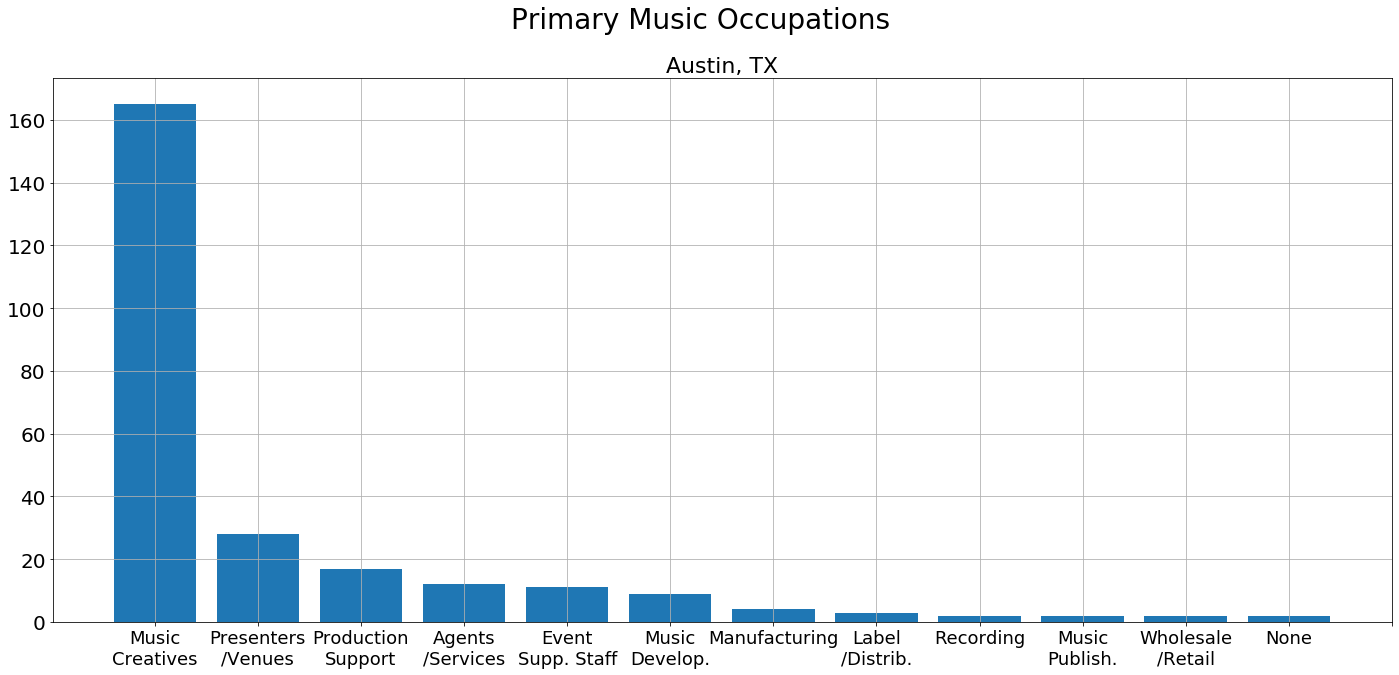

In [52]:
# breakdown of occupation

primary_occ = pd.DataFrame(austin_df['primary_music_occupation'].value_counts(normalize=False))

fig, ax = plt.subplots(figsize=(24, 10))
plt.bar(primary_occ.index, primary_occ['primary_music_occupation'])
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.suptitle('Primary Music Occupations', fontsize = 28)
plt.title('Austin, TX', fontsize=22)
plt.grid(True);

xlab1 = [ "Music", "Presenters", "Production", "Agents", 'Event', 'Music', 'Manufacturing', 'Label', 'Recording', 'Music', 'Wholesale', 'None']
xlab2 = ["Creatives", "/Venues", "Support", "/Services", 'Supp. Staff', 'Develop.', '', '/Distrib.', '', 'Publish.', '/Retail', ''] 
xlabels = [f"{x1}\n{x2}" for x1, x2, in zip(xlab1,xlab2)]
fig, ax = ax.set(xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], xticklabels=xlabels)

# plt.savefig('./for_presentation/occupation_breakdown.png')

In [53]:
# make sure order matches bar graph above

primary_occ;

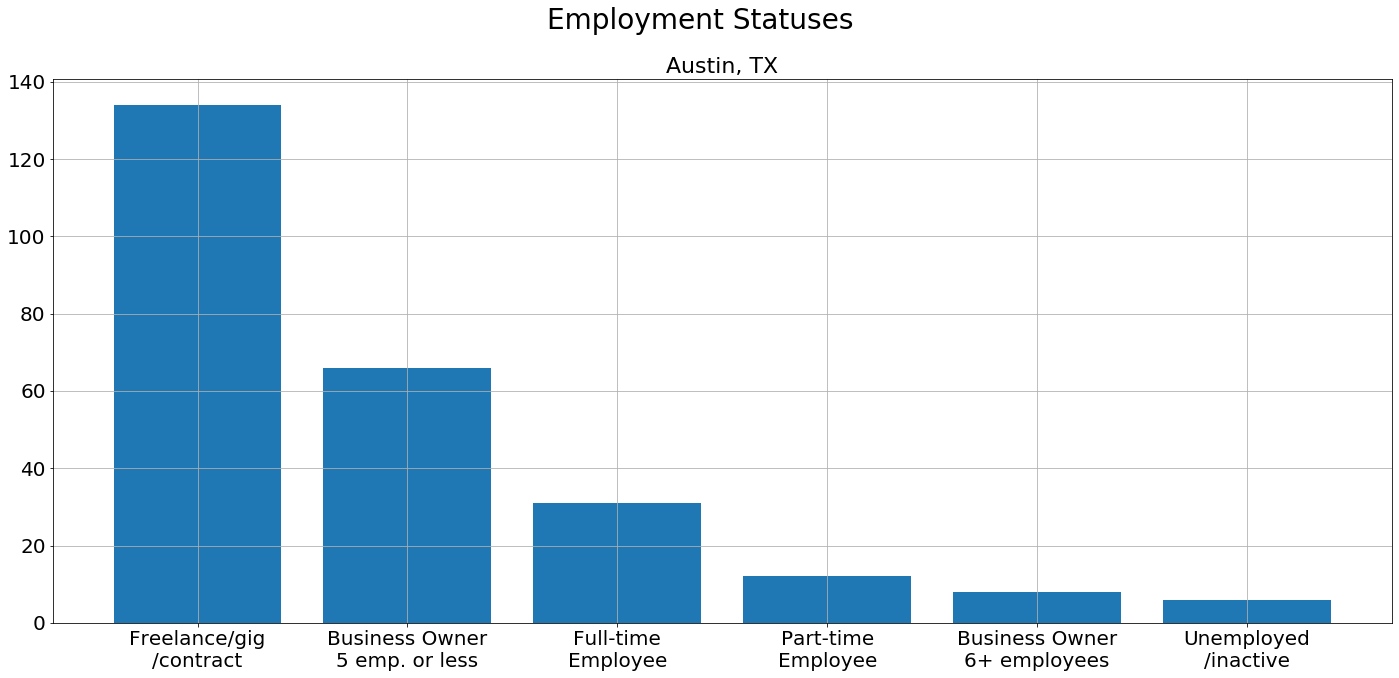

In [54]:
# breakdown of employment status

employ_status = pd.DataFrame(austin_df['music_employment_definition'].value_counts(normalize=False))

fig, ax = plt.subplots(figsize=(24, 10))
plt.bar(employ_status.index, employ_status['music_employment_definition'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.suptitle('Employment Statuses', fontsize = 28)
plt.title('Austin, TX', fontsize=22)
plt.grid(True);

xlab1 = [ "Freelance/gig", "Business Owner", "Full-time", "Part-time", 'Business Owner', 'Unemployed']
xlab2 = ["/contract", "5 emp. or less", "Employee", "Employee", '6+ employees', '/inactive'] 
xlabels = [f"{x1}\n{x2}" for x1, x2, in zip(xlab1,xlab2)]
fig, ax = ax.set(xticks=[0, 1, 2, 3, 4, 5], xticklabels=xlabels)

# plt.savefig('./for_presentation/employment_status_breakdown.png')

In [55]:
# make sure order matches the bar graph above

employ_status;

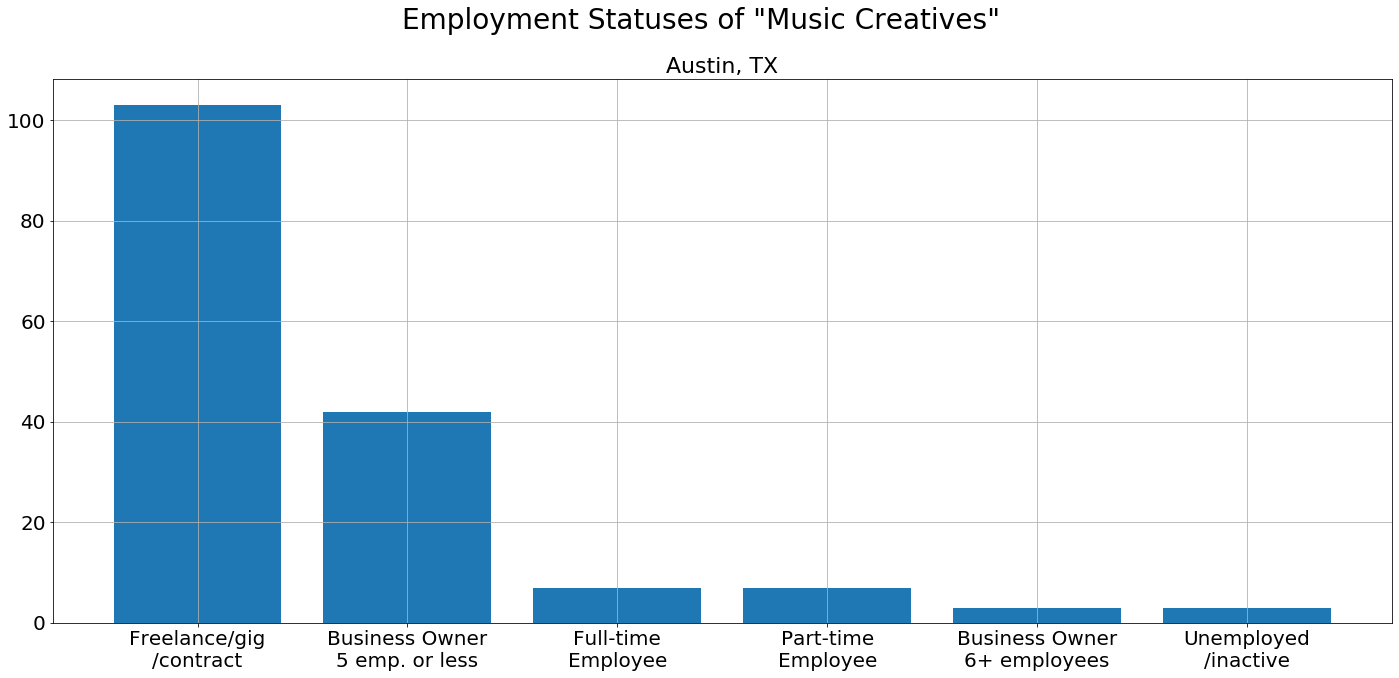

In [56]:
# breakdown of the 165 Music Creatives respondents by employment status

creatives_emp_status = pd.DataFrame(austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives']['music_employment_definition'].value_counts())

fig, ax = plt.subplots(figsize=(24, 10))
plt.bar(creatives_emp_status.index, creatives_emp_status['music_employment_definition'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.suptitle('Employment Statuses of "Music Creatives"', fontsize = 28)
plt.title('Austin, TX', fontsize=22)
plt.grid(True);

xlab1 = [ "Freelance/gig", "Business Owner", "Full-time", "Part-time", 'Business Owner', 'Unemployed']
xlab2 = ["/contract", "5 emp. or less", "Employee", "Employee", '6+ employees', '/inactive'] 
xlabels = [f"{x1}\n{x2}" for x1, x2, in zip(xlab1,xlab2)]
fig, ax = ax.set(xticks=[0, 1, 2, 3, 4, 5], xticklabels=xlabels)

# plt.savefig('./for_presentation/emp_status_musicians.png')

In [57]:
# make sure the order matches the bar graph above

creatives_emp_status;

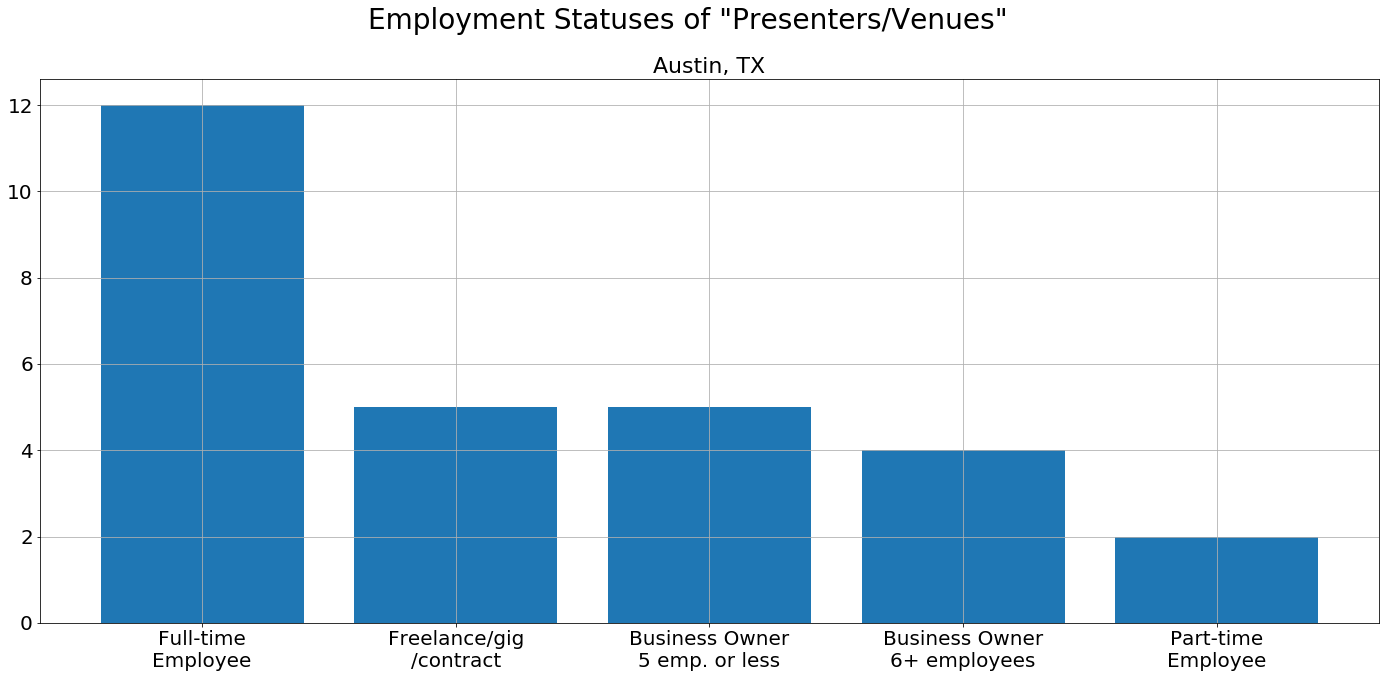

In [58]:
# breakdown of the 28 Venue respondents by employment status

venues_emp_status = pd.DataFrame(austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues']['music_employment_definition'].value_counts())

fig, ax = plt.subplots(figsize=(24, 10))
plt.bar(venues_emp_status.index, venues_emp_status['music_employment_definition'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.suptitle('Employment Statuses of "Presenters/Venues"', fontsize = 28)
plt.title('Austin, TX', fontsize=22)
plt.grid(True);

xlab1 = ["Full-time", "Freelance/gig", "Business Owner", 'Business Owner', "Part-time"]
xlab2 = ["Employee", "/contract", "5 emp. or less", '6+ employees', "Employee"]
xlabels = [f"{x1}\n{x2}" for x1, x2, in zip(xlab1,xlab2)]
fig, ax = ax.set(xticks=[0, 1, 2, 3, 4], xticklabels=xlabels)

# plt.savefig('./for_presentation/emp_status_venues.png')

In [59]:
# make sure order matches the bar graph above

venues_emp_status;

# Which of the 8 forms of assistance do Music Creatives vs Presenters/Venues find to be most helpful?

### Music Creatives

In [60]:
freelance_mc_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['paid_sick_leave_helpful'].value_counts()
freelance_mc_paid_sick_leave.sort_index()

biz_5orfewer_mc_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['paid_sick_leave_helpful'].value_counts()
biz_5orfewer_mc_paid_sick_leave.sort_index()

biz_6plus_mc_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['paid_sick_leave_helpful'].value_counts()
biz_6plus_mc_paid_sick_leave.sort_index()

employee_ft_mc_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['paid_sick_leave_helpful'].value_counts()
employee_ft_mc_paid_sick_leave.sort_index()

employee_pt_mc_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['paid_sick_leave_helpful'].value_counts()
employee_pt_mc_paid_sick_leave.sort_index()

unemployed_mc_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['paid_sick_leave_helpful'].value_counts()
unemployed_mc_paid_sick_leave.sort_index();

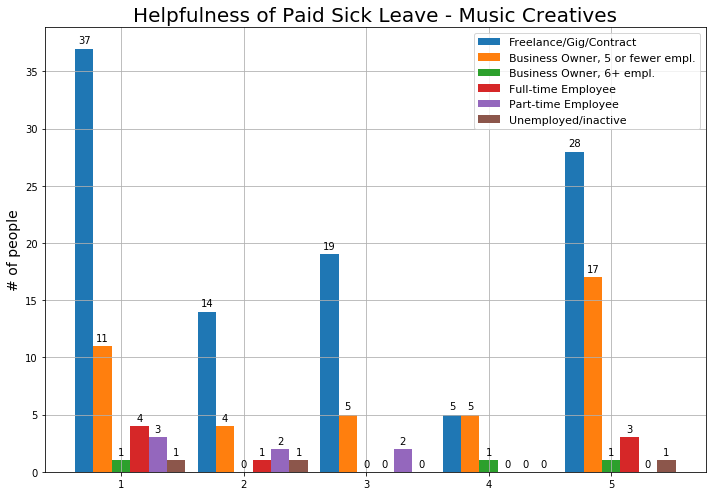

In [61]:
# Paid Sick Leave - Music Creatives by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_mc_count = freelance_mc_paid_sick_leave.sort_index()
biz5orfewer_mc_count = biz_5orfewer_mc_paid_sick_leave.sort_index()
biz6plus_mc_count = [1, 0, 0, 1, 1]
emp_ft_mc_count = [4, 1, 0, 0, 3]
emp_pt_mc_count = [3, 2, 2, 0, 0]
unemployed_mc_count = [1, 1, 0, 0, 1]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_mc_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_mc_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_mc_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_mc_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_mc_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_mc_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Paid Sick Leave - Music Creatives', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11)
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [62]:
freelance_mc_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['paid_family_leave_helpful'].value_counts()
freelance_mc_paid_family_leave.sort_index()

biz_5orfewer_mc_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['paid_family_leave_helpful'].value_counts()
biz_5orfewer_mc_paid_family_leave.sort_index()

biz_6plus_mc_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['paid_family_leave_helpful'].value_counts()
biz_6plus_mc_paid_family_leave.sort_index()

employee_ft_mc_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['paid_family_leave_helpful'].value_counts()
employee_ft_mc_paid_family_leave.sort_index()

employee_pt_mc_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['paid_family_leave_helpful'].value_counts()
employee_pt_mc_paid_family_leave.sort_index()

unemployed_mc_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['paid_family_leave_helpful'].value_counts()
unemployed_mc_paid_family_leave.sort_index();

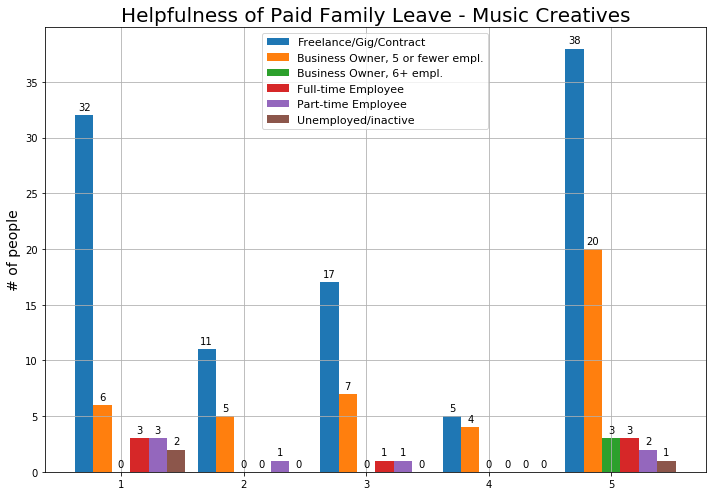

In [63]:
# Paid Family Leave - Music Creatives by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_mc_count = freelance_mc_paid_family_leave.sort_index()
biz5orfewer_mc_count = biz_5orfewer_mc_paid_family_leave.sort_index()
biz6plus_mc_count = [0, 0, 0, 0, 3]
emp_ft_mc_count = [3, 0, 1, 0, 3]
emp_pt_mc_count = [3, 1, 1, 0, 2]
unemployed_mc_count = [2, 0, 0, 0, 1]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_mc_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_mc_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_mc_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_mc_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_mc_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_mc_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Paid Family Leave - Music Creatives', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11)
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [64]:
freelance_mc_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['unemployment_helpful'].value_counts()
freelance_mc_unemployment.sort_index()

biz_5orfewer_mc_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['unemployment_helpful'].value_counts()
biz_5orfewer_mc_unemployment.sort_index()

biz_6plus_mc_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['unemployment_helpful'].value_counts()
biz_6plus_mc_unemployment.sort_index()

employee_ft_mc_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['unemployment_helpful'].value_counts()
employee_ft_mc_unemployment.sort_index()

employee_pt_mc_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['unemployment_helpful'].value_counts()
employee_pt_mc_unemployment.sort_index()

unemployed_mc_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['unemployment_helpful'].value_counts()
unemployed_mc_unemployment.sort_index();

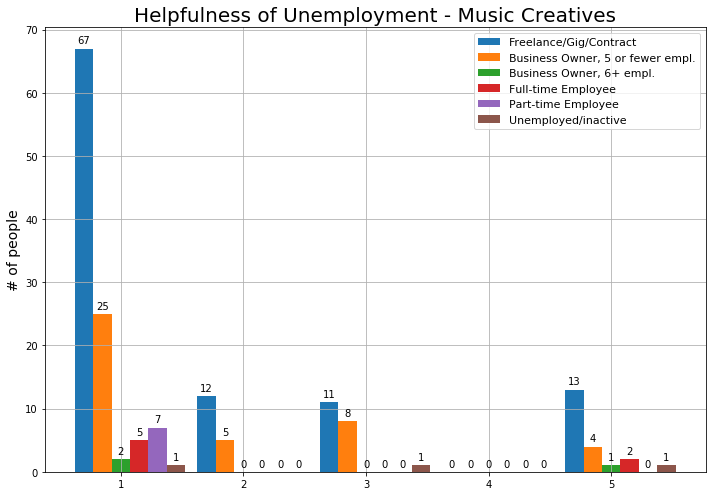

In [65]:
# Unemployment - Music Creatives by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_mc_count = [67, 12, 11, 0, 13]
biz5orfewer_mc_count = [25, 5, 8, 0, 4]
biz6plus_mc_count = [2, 0, 0, 0, 1]
emp_ft_mc_count = [5, 0, 0, 0, 2]
emp_pt_mc_count = [7, 0, 0, 0, 0]
unemployed_mc_count = [1, 0, 1, 0, 1]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_mc_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_mc_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_mc_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_mc_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_mc_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_mc_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Unemployment - Music Creatives', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11)
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [66]:
freelance_mc_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['zero_interest_loans_helpful'].value_counts()
freelance_mc_zero_interest_loans.sort_index()

biz_5orfewer_mc_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['zero_interest_loans_helpful'].value_counts()
biz_5orfewer_mc_zero_interest_loans.sort_index()

biz_6plus_mc_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['zero_interest_loans_helpful'].value_counts()
biz_6plus_mc_zero_interest_loans.sort_index()

employee_ft_mc_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['zero_interest_loans_helpful'].value_counts()
employee_ft_mc_zero_interest_loans.sort_index()

employee_pt_mc_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['zero_interest_loans_helpful'].value_counts()
employee_pt_mc_zero_interest_loans.sort_index()

unemployed_mc_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['zero_interest_loans_helpful'].value_counts()
unemployed_mc_zero_interest_loans.sort_index();

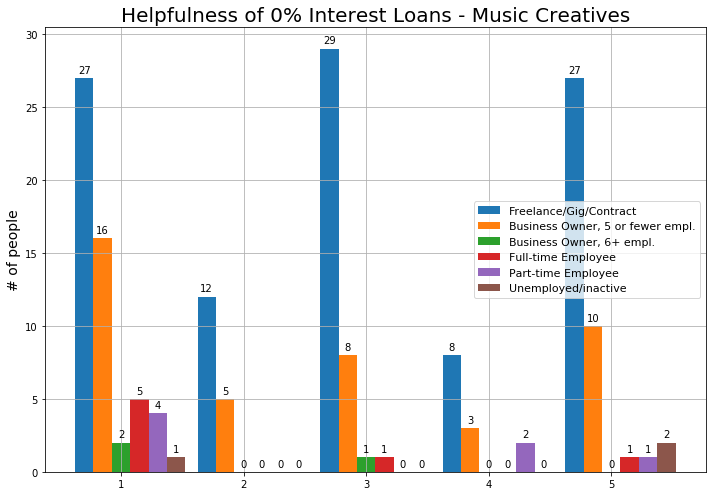

In [67]:
# 0% Interest Loans - Music Creatives by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_mc_count = freelance_mc_zero_interest_loans.sort_index()
biz5orfewer_mc_count = biz_5orfewer_mc_zero_interest_loans.sort_index()
biz6plus_mc_count = [2, 0, 1, 0, 0]
emp_ft_mc_count = [5, 0, 1, 0, 1]
emp_pt_mc_count = [4, 0, 0, 2, 1]
unemployed_mc_count = [1, 0, 0, 0, 2]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_mc_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_mc_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_mc_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_mc_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_mc_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_mc_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of 0% Interest Loans - Music Creatives', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11, loc = 'center right', framealpha = None) # framealpha is transparency
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [68]:
freelance_mc_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['rent_mortgage_susp_helpful'].value_counts()
freelance_mc_rent_mortgage_susp.sort_index()

biz_5orfewer_mc_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['rent_mortgage_susp_helpful'].value_counts()
biz_5orfewer_mc_rent_mortgage_susp.sort_index()

biz_6plus_mc_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['rent_mortgage_susp_helpful'].value_counts()
biz_6plus_mc_rent_mortgage_susp.sort_index()

employee_ft_mc_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['rent_mortgage_susp_helpful'].value_counts()
employee_ft_mc_rent_mortgage_susp.sort_index()

employee_pt_mc_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['rent_mortgage_susp_helpful'].value_counts()
employee_pt_mc_rent_mortgage_susp.sort_index()

unemployed_mc_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['rent_mortgage_susp_helpful'].value_counts()
unemployed_mc_rent_mortgage_susp.sort_index();

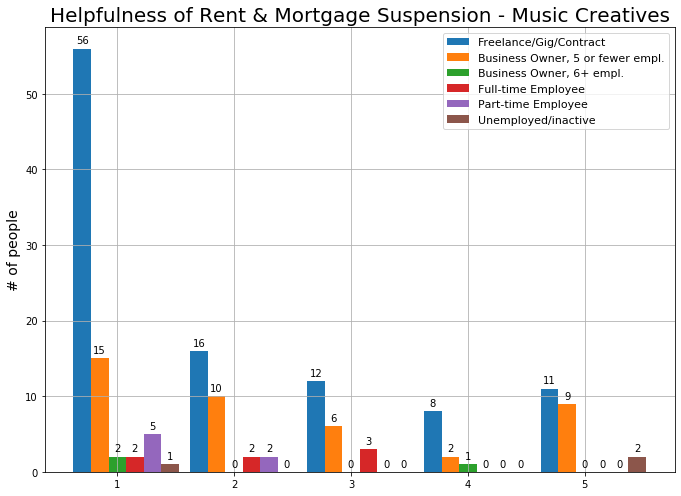

In [69]:
# Rent & Mortgage Suspension - Music Creatives by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_mc_count = freelance_mc_rent_mortgage_susp.sort_index()
biz5orfewer_mc_count = biz_5orfewer_mc_rent_mortgage_susp.sort_index()
biz6plus_mc_count = [2, 0, 0, 1, 0]
emp_ft_mc_count = [2, 2, 3, 0, 0]
emp_pt_mc_count = [5, 2, 0, 0, 0]
unemployed_mc_count = [1, 0, 0, 0, 2]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_mc_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_mc_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_mc_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_mc_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_mc_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_mc_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Rent & Mortgage Suspension - Music Creatives', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11, framealpha = None) # framealpha is transparency
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [70]:
freelance_mc_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['food_housing_assist_helpful'].value_counts()
freelance_mc_food_housing_assist.sort_index()

biz_5orfewer_mc_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['food_housing_assist_helpful'].value_counts()
biz_5orfewer_mc_food_housing_assist.sort_index()

biz_6plus_mc_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['food_housing_assist_helpful'].value_counts()
biz_6plus_mc_food_housing_assist.sort_index()

employee_ft_mc_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['food_housing_assist_helpful'].value_counts()
employee_ft_mc_food_housing_assist.sort_index()

employee_pt_mc_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['food_housing_assist_helpful'].value_counts()
employee_pt_mc_food_housing_assist.sort_index()

unemployed_mc_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['food_housing_assist_helpful'].value_counts()
unemployed_mc_food_housing_assist.sort_index();

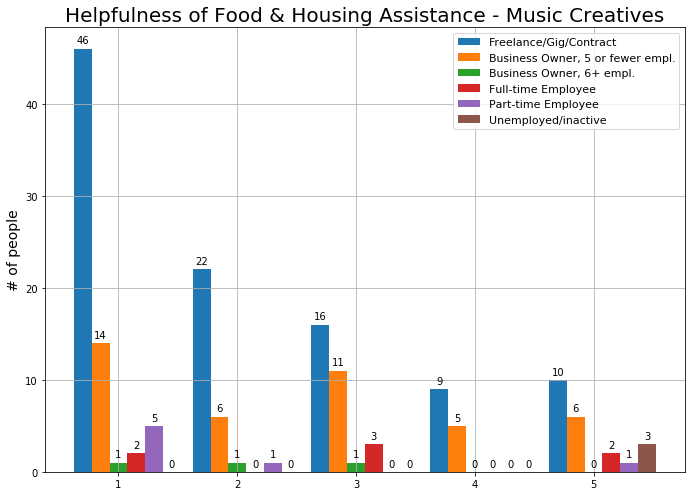

In [71]:
# Food & Housing Assstance - Music Creatives by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_mc_count = freelance_mc_food_housing_assist.sort_index()
biz5orfewer_mc_count = biz_5orfewer_mc_food_housing_assist.sort_index()
biz6plus_mc_count = [1, 1, 1, 0, 0]
emp_ft_mc_count = [2, 0, 3, 0, 2]
emp_pt_mc_count = [5, 1, 0, 0, 1]
unemployed_mc_count = [0, 0, 0, 0, 3]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_mc_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_mc_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_mc_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_mc_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_mc_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_mc_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Food & Housing Assistance - Music Creatives', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11, framealpha = None) # framealpha is transparency
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [72]:
freelance_mc_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['deferred_tax_payments_helpful'].value_counts()
freelance_mc_deferred_tax_payments.sort_index()

biz_5orfewer_mc_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['deferred_tax_payments_helpful'].value_counts()
biz_5orfewer_mc_deferred_tax_payments.sort_index()

biz_6plus_mc_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['deferred_tax_payments_helpful'].value_counts()
biz_6plus_mc_deferred_tax_payments.sort_index()

employee_ft_mc_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['deferred_tax_payments_helpful'].value_counts()
employee_ft_mc_deferred_tax_payments.sort_index()

employee_pt_mc_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['deferred_tax_payments_helpful'].value_counts()
employee_pt_mc_deferred_tax_payments.sort_index()

unemployed_mc_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['deferred_tax_payments_helpful'].value_counts()
unemployed_mc_deferred_tax_payments.sort_index();

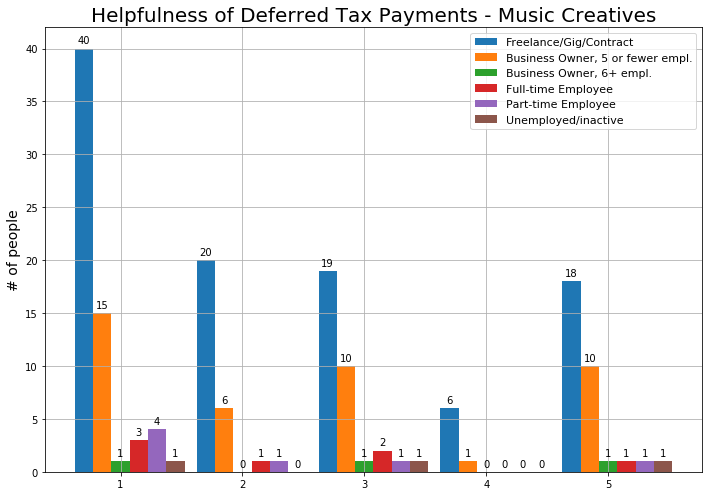

In [73]:
# Deferred Tax Payments - Music Creatives by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_mc_count = freelance_mc_deferred_tax_payments.sort_index()
biz5orfewer_mc_count = biz_5orfewer_mc_deferred_tax_payments.sort_index()
biz6plus_mc_count = [1, 0, 1, 0, 1]
emp_ft_mc_count = [3, 1, 2, 0, 1]
emp_pt_mc_count = [4, 1, 1, 0, 1]
unemployed_mc_count = [1, 0, 1, 0, 1]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_mc_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_mc_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_mc_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_mc_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_mc_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_mc_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Deferred Tax Payments - Music Creatives', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11, framealpha = None) # framealpha is transparency
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [74]:
freelance_mc_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['utility_susp_helpful'].value_counts()
freelance_mc_utility_susp.sort_index()

biz_5orfewer_mc_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['utility_susp_helpful'].value_counts()
biz_5orfewer_mc_utility_susp.sort_index()

biz_6plus_mc_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['utility_susp_helpful'].value_counts()
biz_6plus_mc_utility_susp.sort_index()

employee_ft_mc_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['utility_susp_helpful'].value_counts()
employee_ft_mc_utility_susp.sort_index()

employee_pt_mc_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['utility_susp_helpful'].value_counts()
employee_pt_mc_utility_susp.sort_index()

unemployed_mc_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Music Creatives'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['utility_susp_helpful'].value_counts()
unemployed_mc_utility_susp.sort_index();

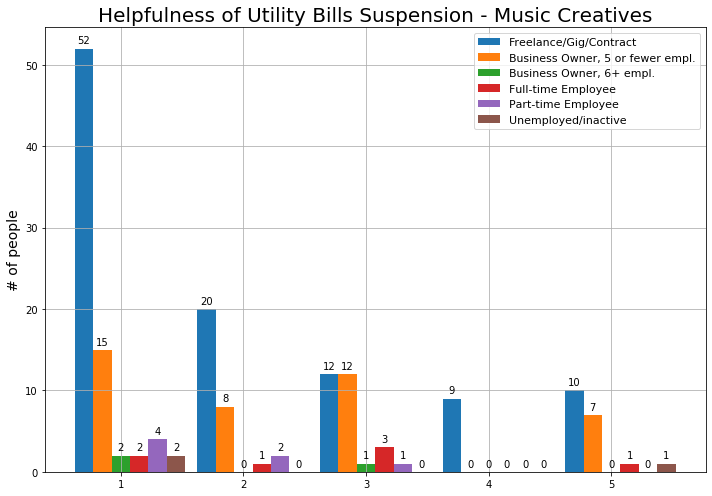

In [75]:
# Utility Bills Suspension - Music Creatives by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_mc_count = freelance_mc_utility_susp.sort_index()
biz5orfewer_mc_count = [15, 8, 12, 0, 7]
biz6plus_mc_count = [2, 0, 1, 0, 0]
emp_ft_mc_count = [2, 1, 3, 0, 1]
emp_pt_mc_count = [4, 2, 1, 0, 0]
unemployed_mc_count = [2, 0, 0, 0, 1]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_mc_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_mc_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_mc_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_mc_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_mc_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_mc_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Utility Bills Suspension - Music Creatives', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11, framealpha = None) # framealpha is transparency
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

### Presenters/Venues

In [76]:
freelance_pv_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['paid_sick_leave_helpful'].value_counts()
freelance_pv_paid_sick_leave.sort_index()

biz_5orfewer_pv_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['paid_sick_leave_helpful'].value_counts()
biz_5orfewer_pv_paid_sick_leave.sort_index()

biz_6plus_pv_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['paid_sick_leave_helpful'].value_counts()
biz_6plus_pv_paid_sick_leave.sort_index()

employee_ft_pv_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['paid_sick_leave_helpful'].value_counts()
employee_ft_pv_paid_sick_leave.sort_index()

employee_pt_pv_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['paid_sick_leave_helpful'].value_counts()
employee_pt_pv_paid_sick_leave.sort_index()

unemployed_pv_paid_sick_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['paid_sick_leave_helpful'].value_counts()
unemployed_pv_paid_sick_leave.sort_index()

Series([], Name: paid_sick_leave_helpful, dtype: int64)

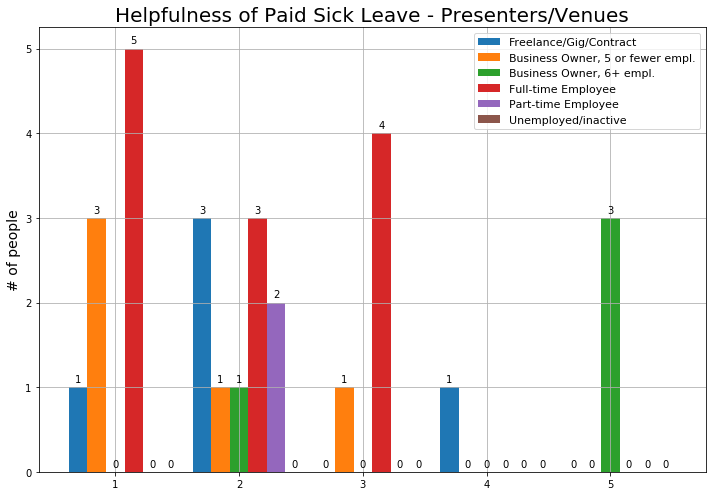

In [77]:
# Paid Sick Leave - Presenters/Venues by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_pv_count = [1, 3, 0, 1, 0]
biz5orfewer_pv_count = [3, 1, 1, 0, 0]
biz6plus_pv_count = [0, 1, 0, 0, 3]
emp_ft_pv_count = [5, 3, 4, 0, 0]
emp_pt_pv_count = [0, 2, 0, 0, 0]
unemployed_pv_count = [0, 0, 0, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_pv_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_pv_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_pv_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_pv_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_pv_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_pv_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Paid Sick Leave - Presenters/Venues', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11)
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [78]:
freelance_pv_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['paid_family_leave_helpful'].value_counts()
freelance_pv_paid_family_leave.sort_index()

biz_5orfewer_pv_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['paid_family_leave_helpful'].value_counts()
biz_5orfewer_pv_paid_family_leave.sort_index()

biz_6plus_pv_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['paid_family_leave_helpful'].value_counts()
biz_6plus_pv_paid_family_leave.sort_index()

employee_ft_pv_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['paid_family_leave_helpful'].value_counts()
employee_ft_pv_paid_family_leave.sort_index()

employee_pt_pv_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['paid_family_leave_helpful'].value_counts()
employee_pt_pv_paid_family_leave.sort_index()

unemployed_pv_paid_family_leave = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['paid_family_leave_helpful'].value_counts()
unemployed_pv_paid_family_leave.sort_index();

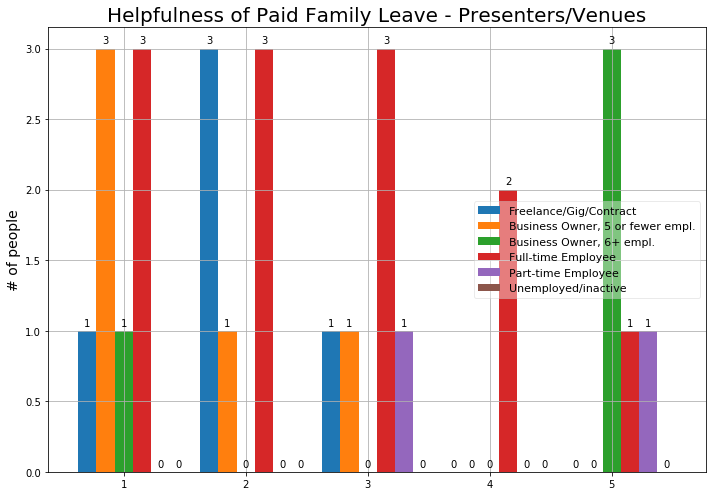

In [79]:
# Paid Family Leave - Presenters/Venues by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_pv_count = [1, 3, 1, 0, 0]
biz5orfewer_pv_count = [3, 1, 1, 0, 0]
biz6plus_pv_count = [1, 0, 0, 0, 3]
emp_ft_pv_count = employee_ft_pv_paid_family_leave.sort_index()
emp_pt_pv_count = [0, 0, 1, 0, 1]
unemployed_pv_count = [0, 0, 0, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_pv_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_pv_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_pv_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_pv_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_pv_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_pv_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Paid Family Leave - Presenters/Venues', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11, loc = 'center right', framealpha = 0.4) # framealpha is transparency
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [80]:
freelance_pv_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['unemployment_helpful'].value_counts()
freelance_pv_unemployment.sort_index()

biz_5orfewer_pv_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['unemployment_helpful'].value_counts()
biz_5orfewer_pv_unemployment.sort_index()

biz_6plus_pv_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['unemployment_helpful'].value_counts()
biz_6plus_pv_unemployment.sort_index()

employee_ft_pv_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['unemployment_helpful'].value_counts()
employee_ft_pv_unemployment.sort_index()

employee_pt_pv_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['unemployment_helpful'].value_counts()
employee_pt_pv_unemployment.sort_index()

unemployed_pv_unemployment = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['unemployment_helpful'].value_counts()
unemployed_pv_unemployment.sort_index();

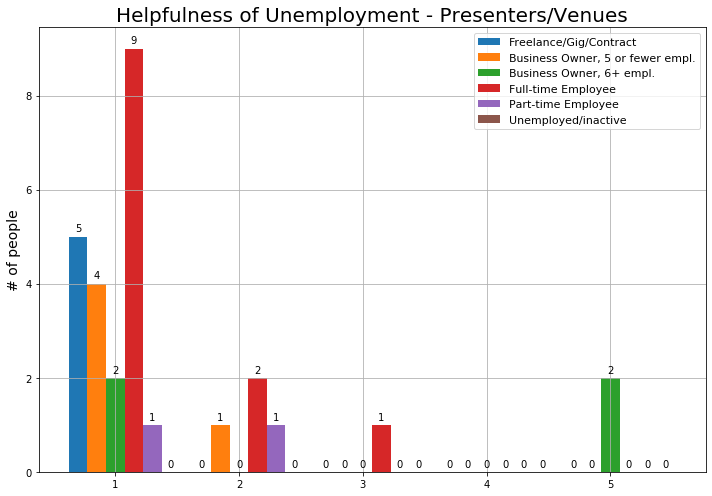

In [81]:
# Unemployment - Presenters/Venues by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_pv_count = [5, 0, 0, 0, 0]
biz5orfewer_pv_count = [4, 1, 0, 0, 0]
biz6plus_pv_count = [2, 0, 0, 0, 2]
emp_ft_pv_count = [9, 2, 1, 0, 0]
emp_pt_pv_count = [1, 1, 0, 0, 0]
unemployed_pv_count = [0, 0, 0, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_pv_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_pv_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_pv_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_pv_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_pv_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_pv_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Unemployment - Presenters/Venues', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11)
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [82]:
freelance_pv_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['zero_interest_loans_helpful'].value_counts()
freelance_pv_zero_interest_loans.sort_index()

biz_5orfewer_pv_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['zero_interest_loans_helpful'].value_counts()
biz_5orfewer_pv_zero_interest_loans.sort_index()

biz_6plus_pv_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['zero_interest_loans_helpful'].value_counts()
biz_6plus_pv_zero_interest_loans.sort_index()

employee_ft_pv_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['zero_interest_loans_helpful'].value_counts()
employee_ft_pv_zero_interest_loans.sort_index()

employee_pt_pv_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['zero_interest_loans_helpful'].value_counts()
employee_pt_pv_zero_interest_loans.sort_index()

unemployed_pv_zero_interest_loans = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['zero_interest_loans_helpful'].value_counts()
unemployed_pv_zero_interest_loans.sort_index();

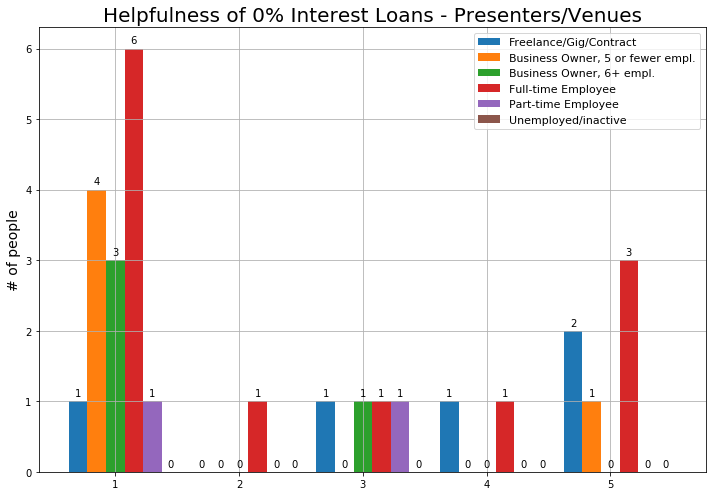

In [83]:
# Zero Interest Loans - Presenters/Venues by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_pv_count = [1, 0, 1, 1, 2]
biz5orfewer_pv_count = [4, 0, 0, 0, 1]
biz6plus_pv_count = [3, 0, 1, 0, 0]
emp_ft_pv_count = employee_ft_pv_zero_interest_loans.sort_index()
emp_pt_pv_count = [1, 0, 1, 0, 0]
unemployed_pv_count = [0, 0, 0, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_pv_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_pv_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_pv_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_pv_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_pv_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_pv_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of 0% Interest Loans - Presenters/Venues', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11)
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [84]:
freelance_pv_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['rent_mortgage_susp_helpful'].value_counts()
freelance_pv_rent_mortgage_susp.sort_index()

biz_5orfewer_pv_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['rent_mortgage_susp_helpful'].value_counts()
biz_5orfewer_pv_rent_mortgage_susp.sort_index()

biz_6plus_pv_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['rent_mortgage_susp_helpful'].value_counts()
biz_6plus_pv_rent_mortgage_susp.sort_index()

employee_ft_pv_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['rent_mortgage_susp_helpful'].value_counts()
employee_ft_pv_rent_mortgage_susp.sort_index()

employee_pt_pv_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['rent_mortgage_susp_helpful'].value_counts()
employee_pt_pv_rent_mortgage_susp.sort_index()

unemployed_pv_rent_mortgage_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['rent_mortgage_susp_helpful'].value_counts()
unemployed_pv_rent_mortgage_susp.sort_index();

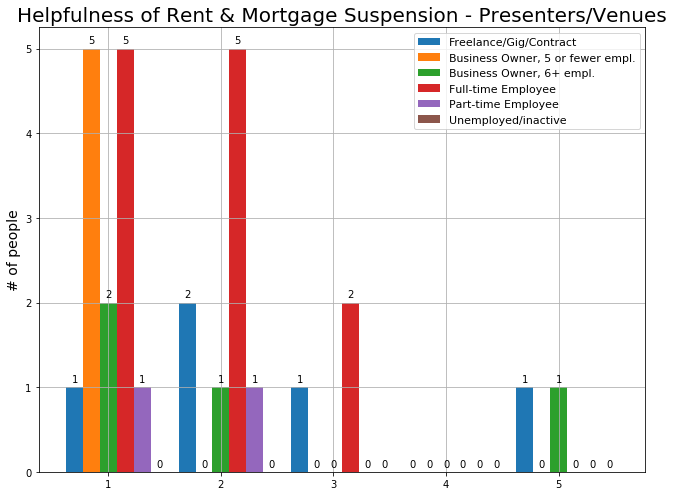

In [85]:
# Rent & Mortgage Suspension - Presenters/Venues by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_pv_count = [1, 2, 1, 0, 1]
biz5orfewer_pv_count = [5, 0, 0, 0, 0]
biz6plus_pv_count = [2, 1, 0, 0, 1]
emp_ft_pv_count = [5, 5, 2, 0, 0]
emp_pt_pv_count = [1, 1, 0, 0, 0]
unemployed_pv_count = [0, 0, 0, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_pv_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_pv_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_pv_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_pv_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_pv_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_pv_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Rent & Mortgage Suspension - Presenters/Venues', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11)
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [86]:
freelance_pv_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['food_housing_assist_helpful'].value_counts()
freelance_pv_food_housing_assist.sort_index()

biz_5orfewer_pv_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['food_housing_assist_helpful'].value_counts()
biz_5orfewer_pv_food_housing_assist.sort_index()

biz_6plus_pv_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['food_housing_assist_helpful'].value_counts()
biz_6plus_pv_food_housing_assist.sort_index()

employee_ft_pv_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['food_housing_assist_helpful'].value_counts()
employee_ft_pv_food_housing_assist.sort_index()

employee_pt_pv_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['food_housing_assist_helpful'].value_counts()
employee_pt_pv_food_housing_assist.sort_index()

unemployed_pv_food_housing_assist = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['food_housing_assist_helpful'].value_counts()
unemployed_pv_food_housing_assist.sort_index();

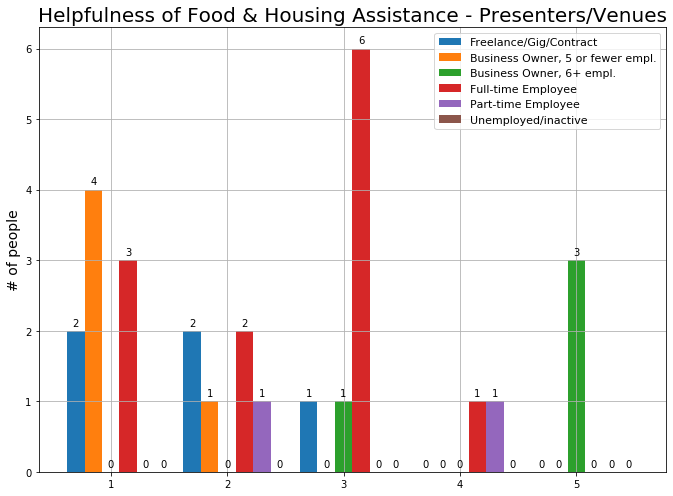

In [87]:
# Food & Housing Assistance - Presenters/Venues by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_pv_count = [2, 2, 1, 0, 0]
biz5orfewer_pv_count = [4, 1, 0, 0, 0]
biz6plus_pv_count = [0, 0, 1, 0, 3]
emp_ft_pv_count = [3, 2, 6, 1, 0]
emp_pt_pv_count = [0, 1, 0, 1, 0]
unemployed_pv_count = [0, 0, 0, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_pv_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_pv_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_pv_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_pv_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_pv_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_pv_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Food & Housing Assistance - Presenters/Venues', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11)
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [88]:
freelance_pv_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['deferred_tax_payments_helpful'].value_counts()
freelance_pv_deferred_tax_payments.sort_index()

biz_5orfewer_pv_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['deferred_tax_payments_helpful'].value_counts()
biz_5orfewer_pv_deferred_tax_payments.sort_index()

biz_6plus_pv_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['deferred_tax_payments_helpful'].value_counts()
biz_6plus_pv_deferred_tax_payments.sort_index()

employee_ft_pv_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['deferred_tax_payments_helpful'].value_counts()
employee_ft_pv_deferred_tax_payments.sort_index()

employee_pt_pv_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['deferred_tax_payments_helpful'].value_counts()
employee_pt_pv_deferred_tax_payments.sort_index()

unemployed_pv_deferred_tax_payments = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['deferred_tax_payments_helpful'].value_counts()
unemployed_pv_deferred_tax_payments.sort_index()

Series([], Name: deferred_tax_payments_helpful, dtype: int64)

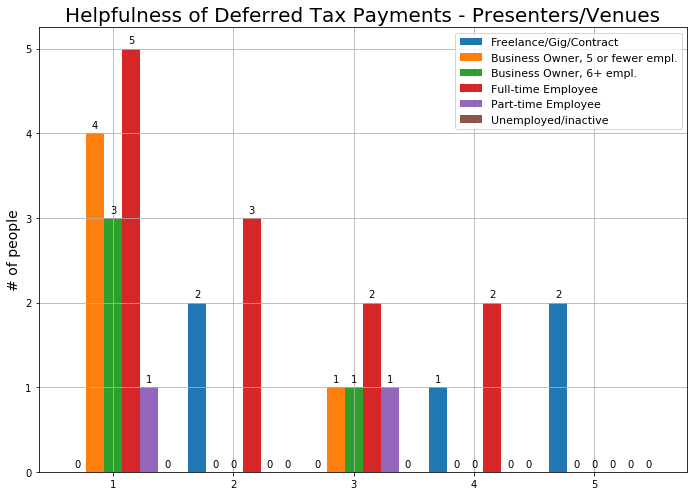

In [89]:
# Deferred Tax Payments - Presenters/Venues by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_pv_count = [0, 2, 0, 1, 2]
biz5orfewer_pv_count = [4, 0, 1, 0, 0]
biz6plus_pv_count = [3, 0, 1, 0, 0]
emp_ft_pv_count = [5, 3, 2, 2, 0]
emp_pt_pv_count = [1, 0, 1, 0, 0]
unemployed_pv_count = [0, 0, 0, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_pv_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_pv_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_pv_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_pv_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_pv_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_pv_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Deferred Tax Payments - Presenters/Venues', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11)
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

In [90]:
freelance_pv_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'FrLan/gig']['utility_susp_helpful'].value_counts()
freelance_pv_utility_susp.sort_index()

biz_5orfewer_pv_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz <6']['utility_susp_helpful'].value_counts()
biz_5orfewer_pv_utility_susp.sort_index()

biz_6plus_pv_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'Biz 6+']['utility_susp_helpful'].value_counts()
biz_6plus_pv_utility_susp.sort_index()

employee_ft_pv_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-FT']['utility_susp_helpful'].value_counts()
employee_ft_pv_utility_susp.sort_index()

employee_pt_pv_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'empl-PT']['utility_susp_helpful'].value_counts()
employee_pt_pv_utility_susp.sort_index()

unemployed_pv_utility_susp = austin_df.loc[austin_df['primary_music_occupation'] == 'Presenters/Venues'].loc\
             [austin_df['music_employment_definition'] == 'unempl']['utility_susp_helpful'].value_counts()
unemployed_pv_utility_susp.sort_index()

Series([], Name: utility_susp_helpful, dtype: int64)

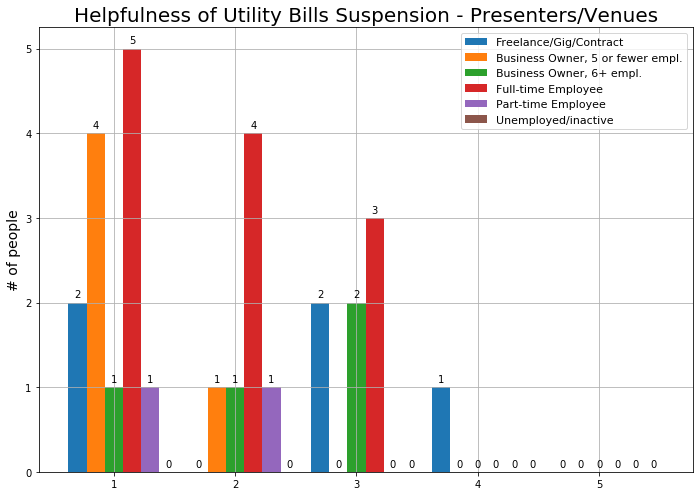

In [91]:
# Utility Bills Suspension - Presenters/Venues by Employment Status

labels = ['1', '2', '3', '4', '5']
freelance_pv_count = [2, 0, 2, 1, 0]
biz5orfewer_pv_count = [4, 1, 0, 0, 0]
biz6plus_pv_count = [1, 1, 2, 0, 0]
emp_ft_pv_count = [5, 4, 3, 0, 0]
emp_pt_pv_count = [1, 1, 0, 0, 0]
unemployed_pv_count = [0, 0, 0, 0, 0]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width*2, freelance_pv_count, width, label='Freelance/Gig/Contract')
rects2 = ax.bar(x - width, biz5orfewer_pv_count, width, label='Business Owner, 5 or fewer empl.')
rects3 = ax.bar(x + width*0, biz6plus_pv_count, width, label='Business Owner, 6+ empl.')
rects4 = ax.bar(x + width, emp_ft_pv_count, width, label='Full-time Employee')
rects5 = ax.bar(x + width*2, emp_pt_pv_count, width, label='Part-time Employee')
rects6 = ax.bar(x + width*3, unemployed_pv_count, width, label='Unemployed/inactive')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of people', fontsize=14)
ax.set_title('Helpfulness of Utility Bills Suspension - Presenters/Venues', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 11)
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()